####  Лабораторная работа 1 

Задание про леденцы

## 1. Подготовка данных

In [ ]:
#   активируем библиотеки

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline


In [ ]:
#  Активируем 3 процедуры
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
!gdown --id 1K6OVbLDeGoIAhojQCPAimAH8mx-KgHrE

Downloading...
From: https://drive.google.com/uc?id=1K6OVbLDeGoIAhojQCPAimAH8mx-KgHrE
To: /content/Data.dat
100% 7.81k/7.81k [00:00<00:00, 14.9MB/s]


## 2. Кластеризуем методом 'ward' с метрикой 'euclidean'

In [ ]:
candy_w = pd.read_csv('Data.dat', sep=";", header = 0, index_col=False)
candy_w

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
333,3,3,3,3,3,3,5,5,3,3,3
334,3,3,3,3,3,3,5,5,3,3,3
335,3,3,3,3,3,3,5,5,3,3,3
336,3,3,3,3,3,3,5,5,3,3,3


In [ ]:
#  Кластеризуем
link_w = linkage(candy_w, 'ward', 'euclidean')

In [ ]:
from scipy.spatial.distance import cityblock

In [ ]:
link_w

array([[  0.        ,   4.        ,   0.        ,   2.        ],
       [  1.        ,   3.        ,   0.        ,   2.        ],
       [  2.        ,   6.        ,   0.        ,   2.        ],
       ...,
       [664.        , 669.        ,  30.21829021, 120.        ],
       [667.        , 672.        ,  43.44161878, 230.        ],
       [671.        , 673.        ,  51.70554708, 338.        ]])

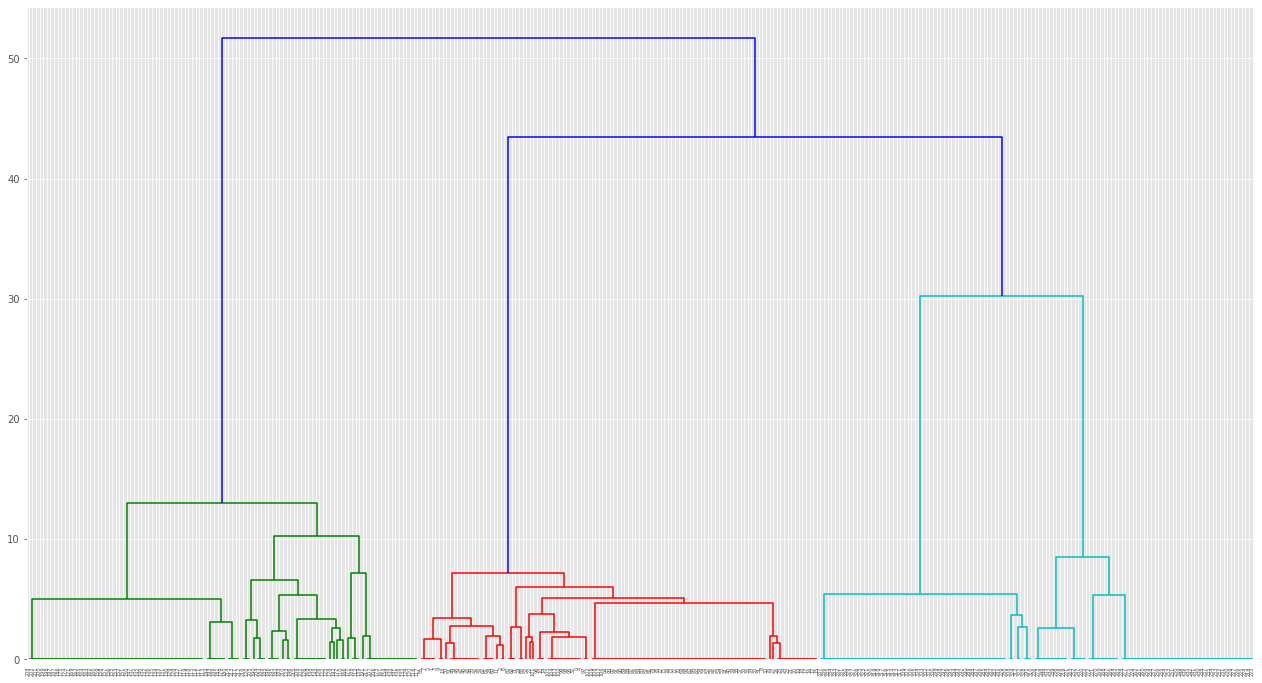

In [ ]:
fig = plt.figure(figsize=(22,12))

dn_w = dendrogram(link_w, labels=candy_w.index.tolist())

Я предположу, что кластеров тут 4, поэтому остановим кластеризацию, когда расстояние между кластерами превысит 15, чтобы в итоге получилось 4 кластера.

Построим "Каменистую осыпь", чтобы убедиться в своей правоте

In [ ]:
link_w

array([[  0.        ,   4.        ,   0.        ,   2.        ],
       [  1.        ,   3.        ,   0.        ,   2.        ],
       [  2.        ,   6.        ,   0.        ,   2.        ],
       ...,
       [664.        , 669.        ,  30.21829021, 120.        ],
       [667.        , 672.        ,  43.44161878, 230.        ],
       [671.        , 673.        ,  51.70554708, 338.        ]])

Text(0, 0.5, 'Расстояние')

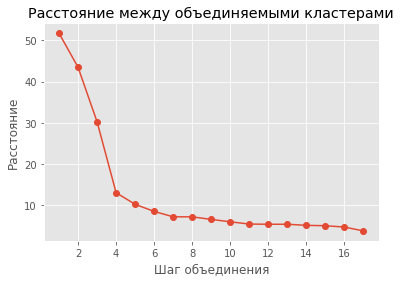

In [ ]:
# Выбираем последние элементы 2-ого столбца матрицы link (где хранятся расстояния между объединяемыми кластерами).
dist = link_w[320:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Видно, что резкие изгибы прекращаются после 4 шага объединения.

In [ ]:
candy_w['cluster'] = fcluster(link_w, 15, criterion='distance')
print(candy_w)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  cluster
0     4   5   5   5   3   3   3   3   3    3    3        2
1     5   4   5   5   3   3   3   3   3    3    3        2
2     5   5   4   5   3   3   3   3   3    3    3        2
3     5   4   5   5   3   3   3   3   3    3    3        2
4     4   5   5   5   3   3   3   3   3    3    3        2
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...      ...
333   3   3   3   3   3   3   5   5   3    3    3        3
334   3   3   3   3   3   3   5   5   3    3    3        3
335   3   3   3   3   3   3   5   5   3    3    3        3
336   3   3   3   3   3   3   5   5   3    3    3        3
337   3   3   3   3   3   3   5   5   3    3    3        3

[338 rows x 12 columns]


In [ ]:
candy_w.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


In [ ]:
candy_w.groupby('cluster').size()

cluster
1    108
2    110
3     59
4     61
dtype: int64

Вывод: 
1. Первый кластер - это люди, которые в основном потребляют леденцы в лечебных целях, для здоровья (v9: "облегчить боль в горле", v10: "избавиться от заложенности носа", v11: "улучшить самочувствие")
2. Второй кластер объединяет людей, которые чаще потребляют леденцы для свежести ("освежить дыхание", "избавиться от неприятного вкуса во рту")
3. Третьему кластеру леденцы помогают сконцентрироваться на каком-то деле или на отдыхе.
4. Четвертой группе людей леденцы заменяют что-то сладкое ("хочется чего-нибудь сладкого", "заменитель кондитерских изделий")

Для метода 'ward' используется только Евклидова метрика, поэтому ниже рассмотрим другие методы.


In [ ]:
candy

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster
0,4,5,5,5,3,3,3,3,3,3,3,2
1,5,4,5,5,3,3,3,3,3,3,3,2
2,5,5,4,5,3,3,3,3,3,3,3,2
3,5,4,5,5,3,3,3,3,3,3,3,2
4,4,5,5,5,3,3,3,3,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
333,3,3,3,3,3,3,5,5,3,3,3,3
334,3,3,3,3,3,3,5,5,3,3,3,3
335,3,3,3,3,3,3,5,5,3,3,3,3
336,3,3,3,3,3,3,5,5,3,3,3,3


## 3. Кластеризуем методом 'centroid' 
(новая центроида при объединении двух кластеров $a$ и $b$ расчитывается как норма разности центройд $c_a$ и $c_b$)

In [ ]:
candy_c = pd.read_csv('Data.dat', sep=";", header = 0, index_col=False)

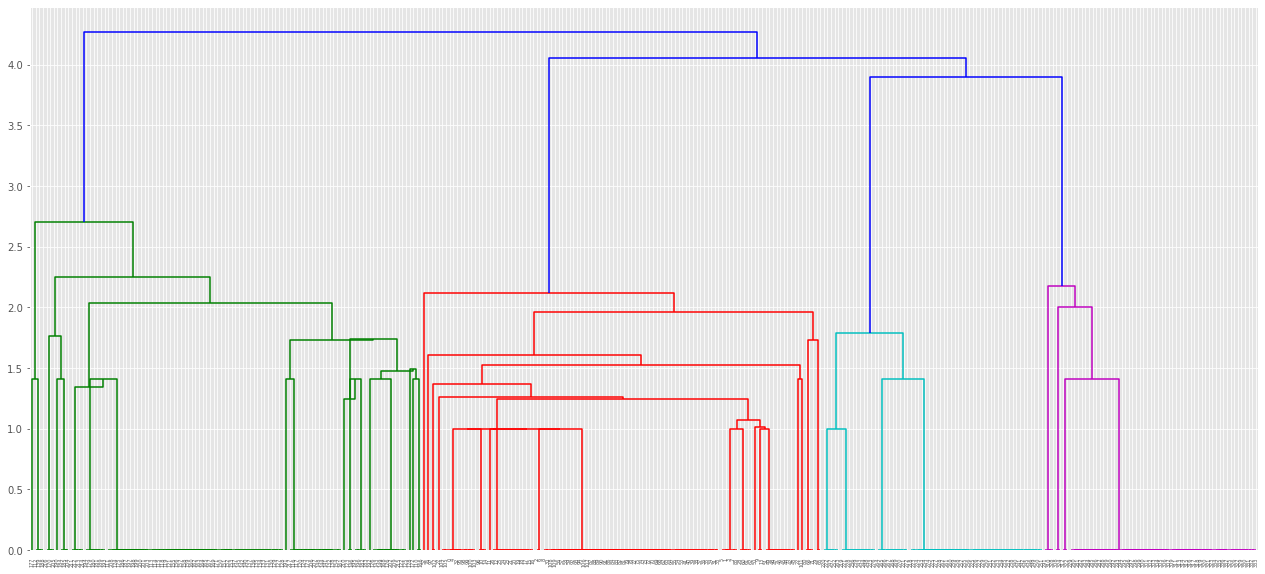

In [ ]:
link_c = linkage(candy_c, 'centroid')

fig = plt.figure(figsize=(22,10))
dn_c = dendrogram(link_c, labels=candy_c.index.tolist())

In [ ]:
link_c

array([[  0.        ,   4.        ,   0.        ,   2.        ],
       [336.        , 337.        ,   0.        ,   2.        ],
       [335.        , 339.        ,   0.        ,   3.        ],
       ...,
       [664.        , 669.        ,   4.02781741, 120.        ],
       [668.        , 672.        ,   4.32624088, 230.        ],
       [671.        , 673.        ,   4.62409313, 338.        ]])

Тут соглашусь с предложенным разделением на 4 кластера. 

In [ ]:
candy_c['cluster'] = fcluster(link_c, 3, criterion='distance')
print(candy_c)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  cluster
0     4   5   5   5   3   3   3   3   3    3    3        2
1     5   4   5   5   3   3   3   3   3    3    3        2
2     5   5   4   5   3   3   3   3   3    3    3        2
3     5   4   5   5   3   3   3   3   3    3    3        2
4     4   5   5   5   3   3   3   3   3    3    3        2
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...      ...
333   3   3   3   3   3   3   5   5   3    3    3        4
334   3   3   3   3   3   3   5   5   3    3    3        4
335   3   3   3   3   3   3   5   5   3    3    3        4
336   3   3   3   3   3   3   5   5   3    3    3        4
337   3   3   3   3   3   3   5   5   3    3    3        4

[338 rows x 12 columns]


In [ ]:
candy_c.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098
4,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000


In [ ]:
candy_c.groupby('cluster').size()

cluster
1    108
2    110
3     61
4     59
dtype: int64

По центроидному методу получились ровно такие же результаты.

## 4. Кластеризуем методом 'single'. 
Расстояние между кластерами = растоянию между ближайшими наблюдениями.

In [ ]:
candy_min_eu = pd.read_csv('Data.dat', sep=";", header = 0, index_col=False)

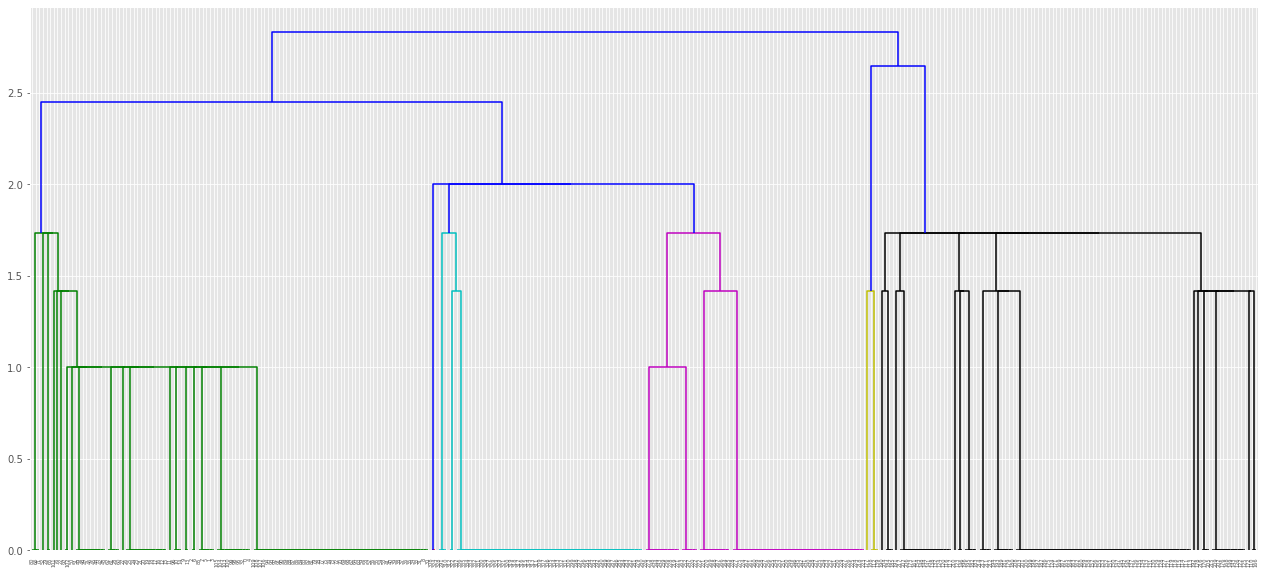

In [ ]:
link_min_eu = linkage(candy_min_eu, 'single')

fig = plt.figure(figsize=(22,10))
dn_min_eu = dendrogram(link_min_eu, labels=candy_min_eu.index.tolist())

Я склоняюсь к тому, что тут 4 кластера.

In [ ]:
link_min_eu

array([[  0.        ,   4.        ,   0.        ,   2.        ],
       [ 32.        , 338.        ,   0.        ,   3.        ],
       [ 95.        , 339.        ,   0.        ,   4.        ],
       ...,
       [663.        , 671.        ,   2.44948974, 230.        ],
       [660.        , 669.        ,   2.64575131, 108.        ],
       [672.        , 673.        ,   2.82842712, 338.        ]])

In [ ]:
candy_min_eu['cluster_4'] = fcluster(link_min_eu, 2, criterion='distance')
print(candy_min_eu)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  cluster_4
0     4   5   5   5   3   3   3   3   3    3    3          1
1     5   4   5   5   3   3   3   3   3    3    3          1
2     5   5   4   5   3   3   3   3   3    3    3          1
3     5   4   5   5   3   3   3   3   3    3    3          1
4     4   5   5   5   3   3   3   3   3    3    3          1
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...        ...
333   3   3   3   3   3   3   5   5   3    3    3          2
334   3   3   3   3   3   3   5   5   3    3    3          2
335   3   3   3   3   3   3   5   5   3    3    3          2
336   3   3   3   3   3   3   5   5   3    3    3          2
337   3   3   3   3   3   3   5   5   3    3    3          2

[338 rows x 12 columns]


In [ ]:
candy_min_eu.groupby('cluster_4').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster_4,,,,,,,,,,,
1,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
2,3.000000,2.983333,2.983333,2.958333,3.900000,3.916667,3.941667,3.900000,2.875000,2.875000,2.875000
3,2.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,5.000000,4.750000,4.750000
4,2.855769,2.788462,2.721154,2.567308,2.634615,2.605769,2.778846,2.913462,4.951923,4.817308,4.865385


In [ ]:
candy_min_eu.groupby('cluster_4').size()

cluster_4
1    110
2    120
3      4
4    104
dtype: int64

Вывод: Данный метод посчитал за выброс кластер людей, которые потребляют леденцы в качестве лекарства (их всего 4 человека). Попробуем выделить 6 кластеров (5, увы, не получится)

In [ ]:
candy_min_eu['cluster_6'] = fcluster(link_min_eu, 1.8, criterion='distance')
print(candy_min_eu)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  cluster_4  cluster_6
0     4   5   5   5   3   3   3   3   3    3    3          1          1
1     5   4   5   5   3   3   3   3   3    3    3          1          1
2     5   5   4   5   3   3   3   3   3    3    3          1          1
3     5   4   5   5   3   3   3   3   3    3    3          1          1
4     4   5   5   5   3   3   3   3   3    3    3          1          1
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...        ...        ...
333   3   3   3   3   3   3   5   5   3    3    3          2          3
334   3   3   3   3   3   3   5   5   3    3    3          2          3
335   3   3   3   3   3   3   5   5   3    3    3          2          3
336   3   3   3   3   3   3   5   5   3    3    3          2          3
337   3   3   3   3   3   3   5   5   3    3    3          2          3

[338 rows x 13 columns]


In [ ]:
candy_min_eu.groupby('cluster_6').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster_4
cluster_6,,,,,,,,,,,,
1,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455,1
2,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,5.000000,5.000000,3.000000,3.000000,3.000000,2
3,3.000000,3.000000,3.000000,2.947368,2.947368,2.947368,4.912281,4.912281,3.000000,3.000000,3.000000,2
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098,2
5,2.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,5.000000,4.750000,4.750000,3
6,2.855769,2.788462,2.721154,2.567308,2.634615,2.605769,2.778846,2.913462,4.951923,4.817308,4.865385,4


In [ ]:
candy_min_eu.groupby('cluster_6').size()

cluster_6
1    110
2      2
3     57
4     61
5      4
6    104
dtype: int64

Вывод: тут уже классификатор за выбросы принял 2 и 5 кластеры. Хотя, лично я (как и классификатор в случае с 4 кластерами) сильной разницы между 2 и 3 кластерами не вижу. 

## 5. Для интереса рассмотрим другую метрику - 'minkowski' (Расстояние Минковского)

In [ ]:
candy_min_m = pd.read_csv('Data.dat', sep=";", header = 0, index_col=False)
candy_min_m

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
333,3,3,3,3,3,3,5,5,3,3,3
334,3,3,3,3,3,3,5,5,3,3,3
335,3,3,3,3,3,3,5,5,3,3,3
336,3,3,3,3,3,3,5,5,3,3,3


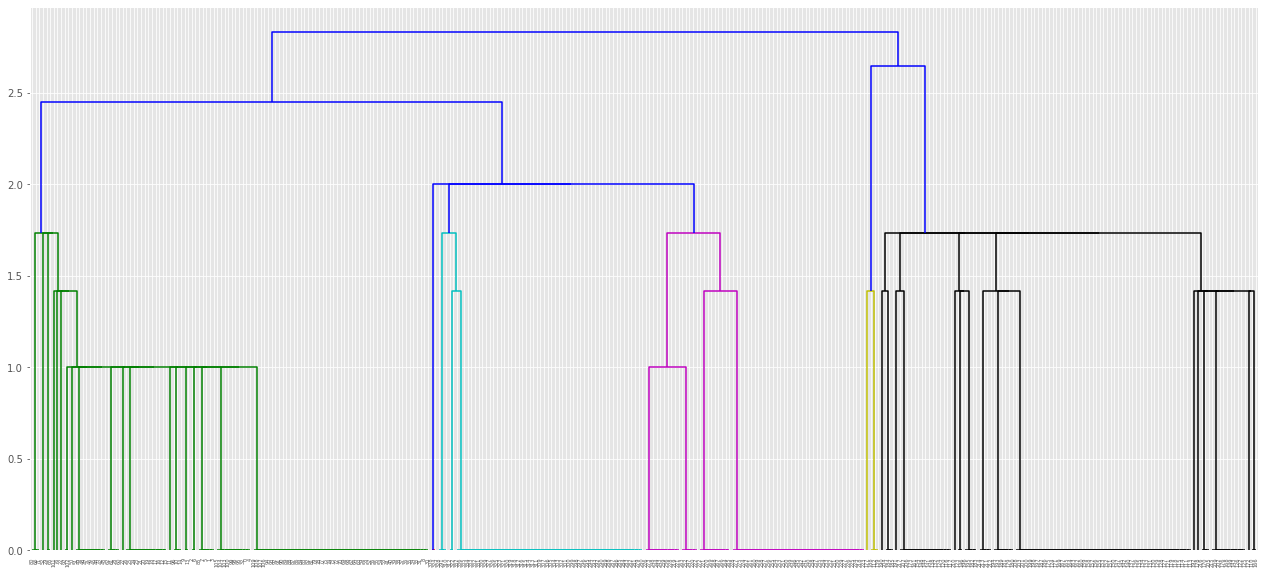

In [ ]:
link_min_m = linkage(candy_min_m, 'single', 'minkowski')

fig = plt.figure(figsize=(22,10))
dn_min_m = dendrogram(link_min_m, labels=candy_min_m.index.tolist())

Тут ярко выражены 4 кластера

In [ ]:
link_min_m

array([[  0.        ,   4.        ,   0.        ,   2.        ],
       [ 32.        , 338.        ,   0.        ,   3.        ],
       [ 95.        , 339.        ,   0.        ,   4.        ],
       ...,
       [663.        , 671.        ,   2.44948974, 230.        ],
       [660.        , 669.        ,   2.64575131, 108.        ],
       [672.        , 673.        ,   2.82842712, 338.        ]])

In [ ]:
candy_min_m['cluster_4'] = fcluster(link_min_m, 2, criterion='distance')
print(candy_min_m)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  cluster_4
0     4   5   5   5   3   3   3   3   3    3    3          1
1     5   4   5   5   3   3   3   3   3    3    3          1
2     5   5   4   5   3   3   3   3   3    3    3          1
3     5   4   5   5   3   3   3   3   3    3    3          1
4     4   5   5   5   3   3   3   3   3    3    3          1
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...        ...
333   3   3   3   3   3   3   5   5   3    3    3          2
334   3   3   3   3   3   3   5   5   3    3    3          2
335   3   3   3   3   3   3   5   5   3    3    3          2
336   3   3   3   3   3   3   5   5   3    3    3          2
337   3   3   3   3   3   3   5   5   3    3    3          2

[338 rows x 12 columns]


In [ ]:
candy_min_m.groupby('cluster_4').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster_4,,,,,,,,,,,
1,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
2,3.000000,2.983333,2.983333,2.958333,3.900000,3.916667,3.941667,3.900000,2.875000,2.875000,2.875000
3,2.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,5.000000,4.750000,4.750000
4,2.855769,2.788462,2.721154,2.567308,2.634615,2.605769,2.778846,2.913462,4.951923,4.817308,4.865385


In [ ]:
candy_min_m.groupby('cluster_4').size()

cluster_4
1    110
2    120
3      4
4    104
dtype: int64

Можно сделать вывод, аналогичный предыдущей построенной модели с 4-мя кластерами

## 6. Рассмотрим метрику - 'cityblock' (Манхетенское расстояние)

In [ ]:
candy_min_cb = pd.read_csv('Data.dat', sep=";", header = 0, index_col=False)

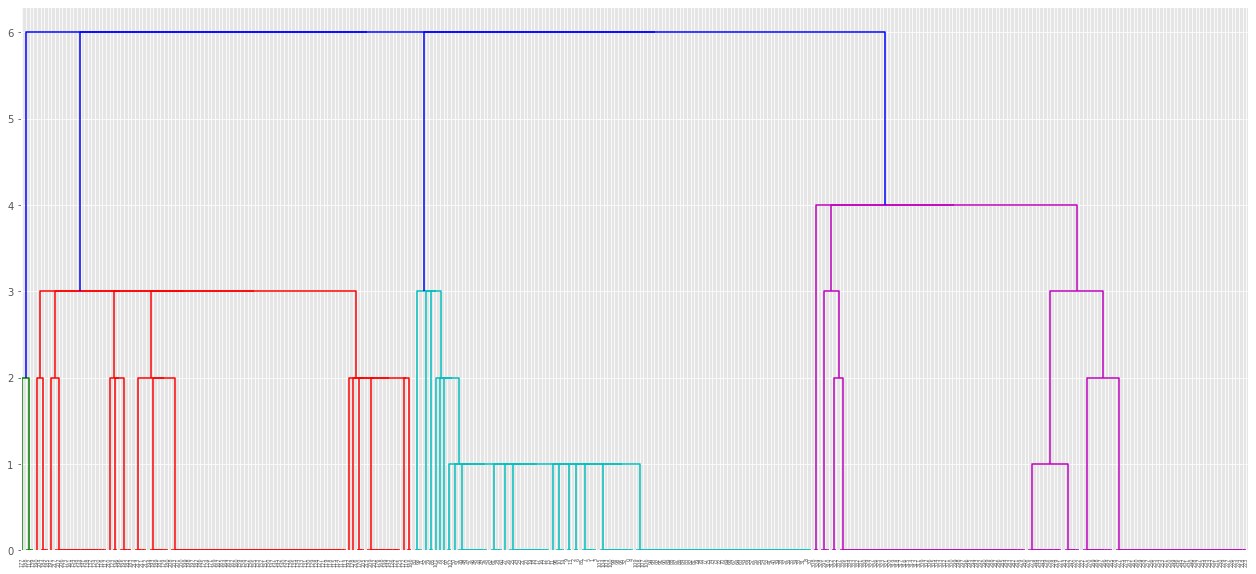

In [ ]:
link_min_cb = linkage(candy_min_cb, 'single', 'cityblock')

fig = plt.figure(figsize=(22,10))
dn_min_cb = dendrogram(link_min_cb, labels=candy_min_cb.index.tolist())

In [ ]:
link_min_cb

array([[  0.,   4.,   0.,   2.],
       [ 32., 338.,   0.,   3.],
       [ 95., 339.,   0.,   4.],
       ...,
       [663., 671.,   6., 230.],
       [669., 672.,   6., 334.],
       [660., 673.,   6., 338.]])

In [ ]:
candy_min_cb['cluster_4'] = fcluster(link_min_cb, 4.1, criterion='distance')
print(candy_min_cb)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  cluster_4
0     4   5   5   5   3   3   3   3   3    3    3          3
1     5   4   5   5   3   3   3   3   3    3    3          3
2     5   5   4   5   3   3   3   3   3    3    3          3
3     5   4   5   5   3   3   3   3   3    3    3          3
4     4   5   5   5   3   3   3   3   3    3    3          3
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...        ...
333   3   3   3   3   3   3   5   5   3    3    3          4
334   3   3   3   3   3   3   5   5   3    3    3          4
335   3   3   3   3   3   3   5   5   3    3    3          4
336   3   3   3   3   3   3   5   5   3    3    3          4
337   3   3   3   3   3   3   5   5   3    3    3          4

[338 rows x 12 columns]


In [ ]:
candy_min_cb.groupby('cluster_4').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster_4,,,,,,,,,,,
1,2.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,5.000000,4.750000,4.750000
2,2.855769,2.788462,2.721154,2.567308,2.634615,2.605769,2.778846,2.913462,4.951923,4.817308,4.865385
3,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
4,3.000000,2.983333,2.983333,2.958333,3.900000,3.916667,3.941667,3.900000,2.875000,2.875000,2.875000


In [ ]:
candy_min_cb.groupby('cluster_4').size()

cluster_4
1      4
2    104
3    110
4    120
dtype: int64

**Вывод: три разных метрики расстояния определяют одно и то же распределение по кластерам.**

## Вопросы

Вопросы:
1. Нет интерпретации полученных результатов (описать, чем характерны те или иные кластеры). -> *подробно расписала в выводе во втором пункте*
2. Нет обоснования выбора метода вычисления межкластерного расстояния и используемой метрики. -> *На самом деле конкретного обоснования у меня и правда нет. Есть методы и метрики, которые я знаю и знаю, что они в основном хорошо работают. Выше рассмотрела разные методы и метрики и сделала выводы.*
3. Как следствие пункта 2. нет альтернативных вариантов построения модели кластеризации и интерпретации результатов.